In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score
from matplotlib.colors import ListedColormap

In [4]:
data = pd.read_csv("Social_Network_Ads.csv")

In [5]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [6]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.25, random_state=0)

In [7]:
sc =StandardScaler()
xtrain = sc.fit_transform(xtrain)

In [8]:
classifier = LogisticRegression()
classifier.fit(xtrain, ytrain)

LogisticRegression()

In [9]:
ypred = classifier.predict(sc.transform(xtest))

In [10]:
print(confusion_matrix(ytest, ypred))

[[65  3]
 [ 8 24]]


In [11]:
print(accuracy_score(ytest, ypred))

0.89


In [12]:
print(precision_score(ytest, ypred))

0.8888888888888888


In [13]:
print(recall_score(ytest, ypred))

0.75


In [14]:
print(f1_score(ytest, ypred))

0.8135593220338984


c:\Users\CLAPVIFVF\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\CLAPVIFVF\AppData\Local\Temp\ipykernel_2888\3935931188.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xset[yset == j, 0], xset[yset == j,1], c =ListedColormap(('red','green'))(i), label = j)


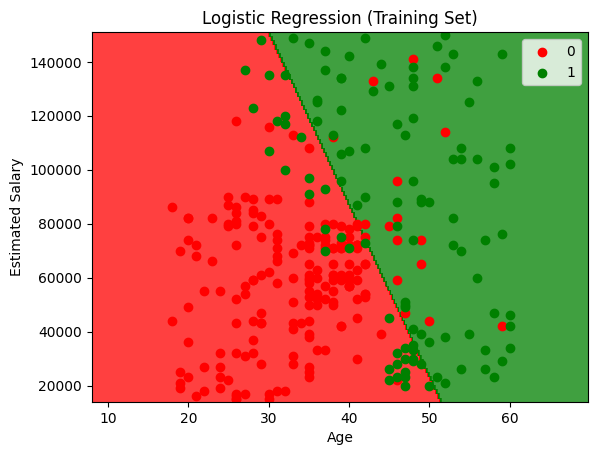

In [15]:
#Visualizing Training set results
xset, yset = sc.inverse_transform(xtrain), ytrain
x1, x2 = np.meshgrid(np.arange(start = xset[:,0].min() - 10, stop = xset[:,0].max()+ 10, step = 0.25), (np.arange(start = xset[:,1].min() - 1000, stop = xset[:,1].max()+1000, step = 0.25)))
plt.contourf(x1,x2, classifier.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(yset)):
    plt.scatter(xset[yset == j, 0], xset[yset == j,1], c =ListedColormap(('red','green'))(i), label = j)
plt.title("Logistic Regression (Training Set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()